<a href="https://colab.research.google.com/github/imgzon3/colab/blob/main/Regression_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀
>선형 회귀는 크게 정규방정식과 미분으로 방법이 나뉜다.

## 데이터 목록

In [ ]:
import numpy as np

# 테스트 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)
# 0부터 2 사이의 100개의 데이터를 생성함

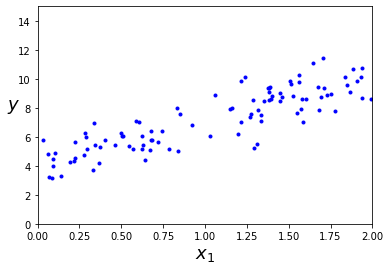

In [ ]:
from matplotlib import pyplot as plt

# 테스트 데이터 확인
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가해 준다
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가합니다.

## 정규방정식

#### 정규방정식으로 계산한 경우

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[3.67678998],
       [3.27186447]])

In [ ]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.67678998],
       [10.22051892]])

### Sklearn 이용하는 경우

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # coef는 계수, intercept는 절편
# 즉, y = ax + b 알 수 있음
# LinearRegression은 주로 경향을 알아보기 위해 많이 사용함

(array([3.67678998]), array([[3.27186447]]))

In [ ]:
lin_reg.predict(X_new)
# sklearn 이용하여 예측

array([[ 3.67678998],
       [10.22051892]])

## 미분

### 배치 경사 하강법

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[3.67678998],
       [3.27186447]])

In [ ]:
X_new_b.dot(theta)

array([[ 3.67678998],
       [10.22051892]])

### SGD(확률적 경사 하강법) numpy로 구현

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

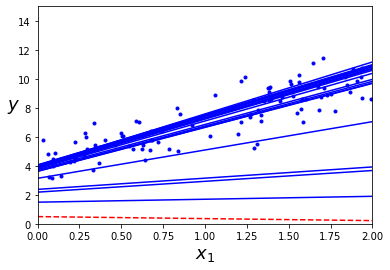

In [25]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼 파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:
      y_predict = X_new_b.dot(theta)
      style = "b-" if i > 0 else "r--"
      plt.plot(X_new, y_predict, style)
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()